 <font face="Times New Roman" size="10" style='color:red'><b> <center>Ordinary Least Squared Problem</font></center></b>

#### Import delle librerie

In [1]:
import numpy as np
import pandas as pd
import numpy.linalg as linalge
import matplotlib.pyplot as plt

# Generazione dei dati

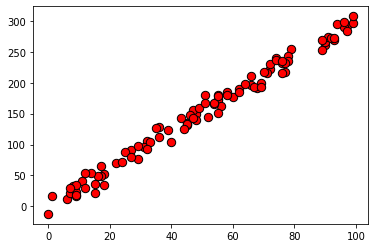

In [163]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x)) +
            (np.random.normal(loc=0, scale=10.0)),X)))

#matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

plt.scatter(X, Y, marker='o', color='red', edgecolor='black', s=70)
plt.show()

**Nota**: Le variabili response sono generate in maniera lineare, tramite la funzione: $$y=\alpha_0 + \alpha_1x$$ 

# Risoluzione tramite i tre metodi numerici 

## <font style='color:black'>Risoluzione tramite il sistema delle equazioni normali $   A^T A$</font>

$$A^T A\begin{bmatrix}
           \alpha \\
           \beta \\
         \end{bmatrix}
         = A^Ty$$

il valore di alpha_0 è: 2.46339138468557
il valore di alpha_1 è : 2.997850244737224


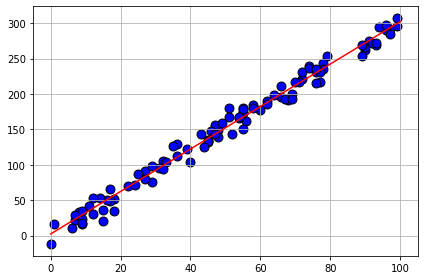

In [164]:
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)

coeff = linalge.solve(AT_A, AT_y) #coefficienti calcolati dal sistema delle equazioni normali
f_a = lambda x: coeff[0] + (coeff[1] * x) #+ coeff[2] * (x**2) + coeff[3] * (x**3) uncomment for the 3-rd grade
print('il valore di alpha_0 è:', coeff[0])
print('il valore di alpha_1 è :', coeff[1])

x = np.linspace(0, 100, n)
plt.scatter(X, Y, marker='o',color='blue',edgecolor='black', s=80)
plt.plot(x,f_a(x), color='red')
plt.grid()
plt.tight_layout()
plt.show()

## Risoluzione attraverso la QR Factorization

il valore di alpha_0 è: 2.463391384685724
il valore di alpha_1 è : 2.997850244737222


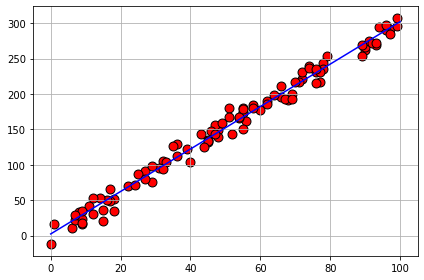

In [165]:
Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

x = np.linspace(0, 100, n)
f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ (QR_alpha[2] * x**2) + (QR_alpha[3] * x**3) uncomment for 3-rd grade

print('il valore di alpha_0 è:', QR_alpha[0])
print('il valore di alpha_1 è :', QR_alpha[1]) 
plt.scatter(X,Y, marker='o',color='red',edgecolor='black', s=80)
plt.plot(x,f_QR(x), color='blue')
plt.grid()
plt.tight_layout()
plt.show()


## Risoluzione attraverso la SVD Factorization

il valore di alpha_0 è: 2.463391384685656
il valore di alpha_1 è : 2.997850244737224


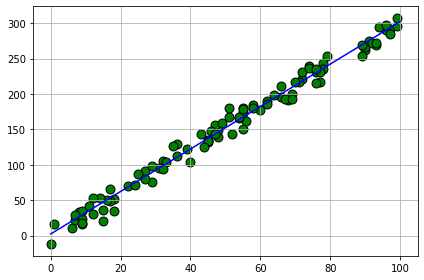

In [166]:
U, S, V = linalge.svd(A)

U_T = U.transpose().dot(Y)
Z = np.array([(u_i / s_i) for (u_i, s_i) in zip(U_T, S)])
SVD_alpha = linalge.solve(V, Z)

x = np.linspace(0, 100, n)
f_svd = lambda x: SVD_alpha[0] + (SVD_alpha[1] * x) # + (SVD_alpha[2] * x**2) + (SVD_alpha[3] * x**3) uncomment for 3-rd grade
print('il valore di alpha_0 è:', SVD_alpha[0])
print('il valore di alpha_1 è :', SVD_alpha[1])
plt.scatter(X, Y, marker='o', color='green', edgecolor='black', s=80)
plt.plot(x, f_svd(x), color='blue')
plt.grid()
plt.tight_layout()
plt.show()

# Discussione dei risultati

Possiamo notare che, indipendentemente dal metodo di approssimazione usato, i *coefficienti* restano i **medesimi**. 

In [167]:
print(f'Parametri ottenuti con la A^T * A  {coeff}')
print(f'Parametri ottenuti con la QR {QR_alpha}')
print(f'Parametri ottenuti con la SVD  {SVD_alpha}')

Parametri ottenuti con la A^T * A  [2.46339138 2.99785024]
Parametri ottenuti con la QR [2.46339138 2.99785024]
Parametri ottenuti con la SVD  [2.46339138 2.99785024]


In [168]:
values = {'Metodo A^TA': coeff, 
       'Metodo QR': QR_alpha, 
       'Metodo SVD': SVD_alpha, 
       'Valori originali': (alpha_0, alpha_1)}
pd.DataFrame(values, index=['alpha 0', 'alpha 1'])

,Metodo A^TA,Metodo QR,Metodo SVD,Valori originali
alpha 0,2.463391,2.463391,2.463391,2
alpha 1,2.997850,2.997850,2.997850,3


Per quanto riguarda i residui, che abbiamo calcolato utilizzando la norma euclidea al quadrato $$ \lvert\lvert y -\hat{y}   \rvert\rvert^2_{2}  $$ possiamo affermare che anche questi restano i medesimi.

In [169]:
print('Residuo normalizzato calcolato con A^T * A: ', np.linalg.norm(Y - f_a(X))**2)
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)
print('Residuo normalizzato calcolato con la SVD: ', np.linalg.norm(Y - f_svd(X))**2)

Residuo normalizzato calcolato con A^T * A:  10024.951484519299
Residuo normalizzato calcolato con la QR:  10024.951484519293
Residuo normalizzato calcolato con la SVD:  10024.951484519304


# Confronto e analisi dei risultati con librerie built-in di Python

Ciò che andremo ad effettuare adesso è un calcolo dell'approssimazione ai minimi quadrati attraverso librerie built-in di Python

In [170]:
print(f'Valori calcolati dal metodo polyfit {np.polyfit(X, Y, 1)[1]:.8f}  {np.polyfit(X, Y, 1)[0]:.8f}')
print(f'Valori calcolati dal metodo lstsq {np.linalg.lstsq(A, Y, rcond=None)[0]}')
print(f'\nParametri ottenuti con la A^T * A  {coeff}')
print(f'Parametri ottenuti con la QR {QR_alpha}')
print(f'Parametri ottenuti con la SVD  {SVD_alpha}')

Valori calcolati dal metodo polyfit 2.46339138  2.99785024
Valori calcolati dal metodo lstsq [2.46339138 2.99785024]

Parametri ottenuti con la A^T * A  [2.46339138 2.99785024]
Parametri ottenuti con la QR [2.46339138 2.99785024]
Parametri ottenuti con la SVD  [2.46339138 2.99785024]


**Possiamo dire che i valori ottenuti con i metodi built-in di Numpy sono gli stessi di quelli calcolati con i metodi implementati**

#### Residui

In [171]:
print('Il residuo calcolato dal metodo lstsq:', np.linalg.lstsq(A, Y, rcond=None)[1])
print('Il residuo calcolato dal metodo polyfit:', np.polyfit(X, Y,1, full=True)[1])
print('\nResiduo normalizzato calcolato con A^T * A: ', np.linalg.norm(Y - f_a(X))**2)
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)
print('Residuo normalizzato calcolato con la SVD: ', np.linalg.norm(Y - f_svd(X))**2)

Il residuo calcolato dal metodo lstsq: [10024.95148452]
Il residuo calcolato dal metodo polyfit: [10024.95148452]

Residuo normalizzato calcolato con A^T * A:  10024.951484519299
Residuo normalizzato calcolato con la QR:  10024.951484519293
Residuo normalizzato calcolato con la SVD:  10024.951484519304


**Il residuo coincide con quello calcolato attraverso i tre metodi suddetti**

#  Incremento della dimensionalità

### n = 100000, m = 1

In [10]:
alpha_0 = 2
alpha_1 = 3
n = 100000 #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ QR_alpha[2] * (x**2)

print('Residuo normalizzato calcolato con la QR(n=100000): ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato calcolato con la QR(n=100000):  90619849.43244478


+ Se aumentiamo il numero di dati, nel caso di una regressione lineare semplice (m=1) otteniamo un residuo normalizzato molto più alto rispetto al caso precedente

### n = 100000, m = 3

In [11]:
alpha_0 = 2
alpha_1 = 3
n = 1000000  #numero elementi
m = 3  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) #+ QR_alpha[2] * (x**2)

print('Residuo normalizzato calcolato con la QR(n=1000000) (m=3): ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato calcolato con la QR(n=1000000) (m=3):  901687247.8804889


+ E' chiaro che se aumentiamo il grado del polinomio di miglior approssimazione al **grado *3*** otteniamo un residuo più alto rispetto al precedente poichè la relazione in input dei nostri dati è una relazione lineare

### n = 100000,  y definita come polinomio di secondo grado, m=1 / m=2

In [145]:
alpha_0 = 2
alpha_1 = 3
alpha_2 = 7
n = 1000000  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + (alpha_2 * (x**2)) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) 

print('Residuo normalizzato (m=1, retta) calcolato con la QR(n=1000000) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=1, retta) calcolato con la QR(n=1000000) su y polinomiale:  27223028225146.273


In [146]:
alpha_0 = 2
alpha_1 = 3
alpha_2 = 7
n = 1000000  #numero elementi
m = 2  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + (alpha_2 * (x**2)) +
            (np.random.normal(loc=0, scale=30)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x) + QR_alpha[2] * (x**2)

print('Residuo normalizzato (m=2, polinomio di grado 2) calcolato con la QR(n=1000000) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=2, polinomio di grado 2) calcolato con la QR(n=1000000) su y polinomiale:  900346100.0168169


+ Definendo in partenza la relazione polinomiale della variabile *response*, possiamo notare la presenza di un valore molto alto di residuo, applicando una regressione lineare, in contrapposizione ad un valore molto più basso con regressione polinomiale di secondo grado. Questo a riprova del fatto che un polinomio di secondo grado approssima meglio i dati

# Modifica del tipo di rumore

#### varianza = 20

In [185]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=20)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

x = np.linspace(0, 100, n)
f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * X) #+ QR_alpha[2] * (x**2)

print('I coefficienti calcolati sono: ', QR_alpha[0], QR_alpha[1])
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)#norma due al quadrato



I coefficienti calcolati sono:  -0.7778638790246077 3.0391278051834174
Residuo normalizzato calcolato con la QR:  36076.55234366687


#### varianza = 50

In [193]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) +
            (np.random.normal(loc=0, scale=50)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * X) #+ QR_alpha[2] * (x**2)

print('I coefficienti calcolati sono: ', QR_alpha[0], QR_alpha[1])
print('Residuo normalizzato calcolato con la QR: ', np.linalg.norm(Y - f_QR(X))**2)#norma due al quadrato

I coefficienti calcolati sono:  6.966595299230176 2.908817436691342
Residuo normalizzato calcolato con la QR:  261799.04561189652


**Considerazioni**
1. Come si può evincere dai risultati precedenti, aumentando la varianza dell'errore, i residui aumentano: questo indica che il modello di regressione lineare approssima *peggio* i dati nel caso di varianza alta
2. Infatti, anche i parametri stimati non sono *ben approssimati*: in particolare, il valore dell' **intercetta** è molto differente dal valore *alpha_0* definito inizialmente 

#### Modifica della funzione di distribuzione del rumore

In [194]:
alpha_0 = 2
alpha_1 = 3

n = 100  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * x) + 
            (np.random.chisquare(4)), X)))

A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)


Q, R = linalge.qr(A)
C = Q.transpose().dot(Y)
QR_alpha = np.linalg.solve(R, C)

f_QR = lambda x: QR_alpha[0] + (QR_alpha[1] * x)
print('Residuo normalizzato (m=1) calcolato con la QR(n=100) su y polinomiale: ', np.linalg.norm(Y - f_QR(X))**2)


Residuo normalizzato (m=1) calcolato con la QR(n=100) su y polinomiale:  578.0440062001564


+ Se il residuo non fosse estratto da una normale, ma da una $\chi^2$ con 4 gradi di libertà, avremmo un residuo *più basso* rispetto al caso della *normale*

# Ulteriori analisi

#### 1. Utilizzando un numero di *n* pari a **1000000**, possiamo notare che con la risoluzione del *sistema normale* otteniamo un valore di residuo molto *alto* rispetto ad esempio al calcolo con la *SVD*

In [195]:
alpha_0 = 2
alpha_1 = 3
n = 1000000  #numero elementi
m = 1  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x)) +
            (np.random.normal(loc=0, scale=30)), X)))

#creazione della matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)
    
#risolvo col sistema di equazioni normali
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)
coeff = linalge.solve(AT_A, AT_y)
y_a = coeff[0] + coeff[1] * X
residuo_sistema = linalge.norm(Y - y_a)

#risolvo con la SVD
U, S, V = linalge.svd(A, full_matrices=False)
z = (U.transpose().dot(Y)) / S
SVD_alpha = V.transpose().dot(z)
ySVD = SVD_alpha[0] + SVD_alpha[1] * X

residuo_svd = linalge.norm(Y - ySVD)

print(f'Il residuo calcolato con il sistema delle equazioni normali è (n=1000000): {residuo_sistema}')
print(f'Il residuo calcolato con la SVD è (n=1000000): {residuo_svd}')

Il residuo calcolato con il sistema delle equazioni normali è (n=1000000): 111694.25186199168
Il residuo calcolato con la SVD è (n=1000000): 30027.103013423137


Possiamo concludere che il metodo delle *equazioni normali* risulta **peggiore** rispetto al metodo basato sulla *fattorizzazione SVD*

#### 2. Utilizzando un numero di n pari a **1000000**, possiamo notare che con la risoluzione del sistema normale otteniamo **coefficienti**  $\alpha_0 e \alpha_1$ completamente differenti rispetto al calcolo con la SVD o con il metodo built-in lstsq di Numpy


In [197]:
print(f'I coefficienti calcolati con la SVD sono: {SVD_alpha}')
print(f'I coefficienti calcolati con il metodo built-in di Numpy lstsq sono: {linalge.lstsq(A, Y, rcond=None)[0]}')
print(f'I coefficienti calcolati con il sistema delle equazioni normali sono: {coeff}')


I coefficienti calcolati con la SVD sono: [1.95269278 3.00077634]
I coefficienti calcolati con il metodo built-in di Numpy lstsq sono: [1.95269278 3.00077634]
I coefficienti calcolati con il sistema delle equazioni normali sono: [186.36508944  -0.72355914]


Questo a riconferma che il metodo delle equazioni normali risulti il *peggiore*  
Il metodo *lstsq* e il metodo *SVD* risultano essere i migliori nel caso in cui il numero di dati sia elevato

#### 3. Uso di un polinomio di grado elevato

Uso di un polinomio di grado *quattro* e applicazione della **fattorizzazione SVD** e del **sistema delle equazioni normali**

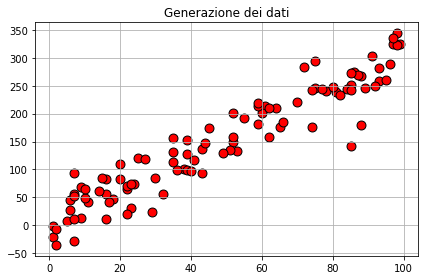

In [24]:
alpha_0 = 2
alpha_1 = 3
n = 100  #numero elementi
m = 4  #grado del polinomio
X = np.random.randint(0, 100, n)
Y = np.array(
    list(
        map(
            lambda x: alpha_0 + (alpha_1 * (x)) +
            (np.random.normal(loc=0, scale=30)),X)))

#matrice di Vandermonde
A = np.full((n, m + 1), 1)
for i in range(1, m + 1):
    A[:, i] = np.power(X, i)

plt.scatter(X, Y, marker='o', color='red', edgecolor='black', s=80)
plt.title('Generazione dei dati')
plt.grid()
plt.tight_layout()
plt.show()

**Risoluzione tramite il sistema delle equazioni normali e della fattorizzazione SVD**

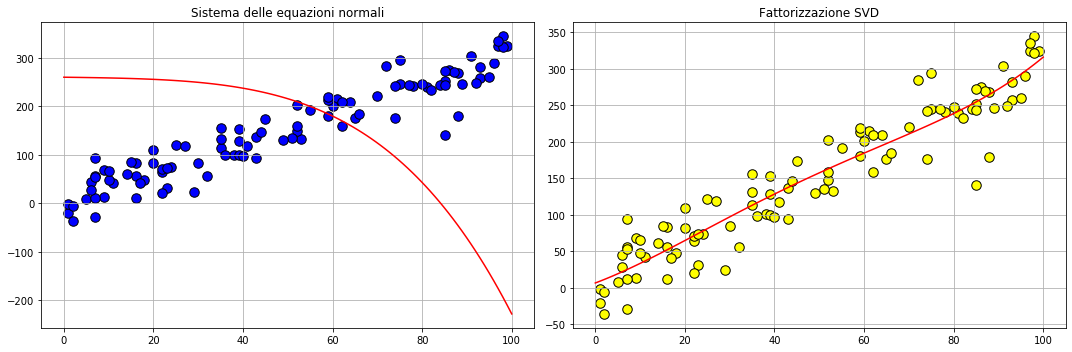

In [25]:
AT_A = A.T.dot(A)
AT_y = A.T.dot(Y)

coeff = linalge.solve(AT_A, AT_y)
f_a = lambda x: coeff[0] + (coeff[1] * x) + coeff[2] * (x**2) + coeff[3] * (x**3) + coeff[4] * (x**4)   

U, S, V = linalge.svd(A)

U_T = U.transpose().dot(Y)
Z = np.array([(u_i / s_i) for (u_i, s_i) in zip(U_T, S)])
SVD_alpha = linalge.solve(V, Z)

x = np.linspace(0, 100, n)
f_svd = lambda x: SVD_alpha[0] + (SVD_alpha[1] * x)  + (SVD_alpha[2] * x**2) + (SVD_alpha[3] * x**3) + (SVD_alpha[4] * x**4) 

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1)
plt.title("Sistema delle equazioni normali")
plt.scatter(X, Y, marker='o',color='blue',edgecolor='black', s=90)
plt.plot(x,f_a(x), color='red')
plt.grid()
plt.tight_layout()
plt.subplot(1, 2, 2)
plt.title("Fattorizzazione SVD")
plt.scatter(X, Y, marker='o',color='yellow',edgecolor='black', s=90)
plt.plot(x,f_svd(x), color='red')
plt.grid()
plt.tight_layout()
plt.show()

- Possiamo notare che con il sistema delle equazioni normali il metodo diventa instabile. Questo poichè la matrice $A^TA$ diventa *malcondizionata*, cioè per $n\rightarrow\infty\quad det(A^TA)\rightarrow 0 $ e, dunque, solo metodi come la SVD riescono ad approssimare al meglio.